In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


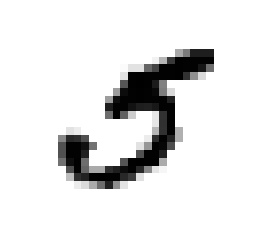

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
training_size = 50000
validation_size = 10000
test_size = 10000
X_train, X_validation, X_test = X[:training_size], X[training_size:training_size + validation_size], X[training_size + validation_size:]
print("sizes:", len(X_train), len(X_validation), len(X_test))
y_train, y_validation, y_test = y[:training_size], y[training_size:training_size + validation_size], y[training_size + validation_size:]

import numpy as np

shuffle_index = np.random.permutation(training_size)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

sizes: 50000 10000 10000


In [6]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_validation)
val_correct_percentage = sum(y_pred_rf == y_validation) / len(y_validation) * 100

In [7]:
print(val_correct_percentage)

30.93


In [21]:
from sklearn.model_selection import GridSearchCV

param_distribs = {
    'n_estimators': [64, 128, 256, 512, 1024, 2048],
    'max_leaf_nodes': [64, 128, 256, 512, 1024, 2048]
}

grid_search_one = GridSearchCV(rnd_clf, param_distribs, cv=5, scoring="neg_mean_squared_error")
grid_search_one.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=128,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [64, 128, 256, 512, 1024, 2048], 'n_estimators': [64, 128, 256, 512, 1024, 2048]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [22]:
grid_search_one.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=2048,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [8]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
def cross_val_scores(regressor):
    scores = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    display_scores(rmse_scores)
    return rmse_scores

In [24]:
cross_val_scores(grid_search_one.best_estimator_)

Scores: [ 0.62769897  0.61981408  0.70618713  0.60216277  0.64915329  0.64937226
  0.57555734  0.59688462  0.6534954   0.58412732]
Mean: 0.626445318605
Standard deviation: 0.0374448677151


array([ 0.62769897,  0.61981408,  0.70618713,  0.60216277,  0.64915329,
        0.64937226,  0.57555734,  0.59688462,  0.6534954 ,  0.58412732])

In [25]:
param_distribs = {
    'n_estimators': [400, 512, 600],
    'max_leaf_nodes': [2048, 4096, 8192]
}

grid_search_two = GridSearchCV(rnd_clf, param_distribs, cv=5, scoring="neg_mean_squared_error")
grid_search_two.fit(X_train, y_train)
grid_search_two.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=8192,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [26]:
cross_val_scores(grid_search_two.best_estimator_)

Scores: [ 0.58194616  0.57358748  0.63931077  0.59866518  0.57358522  0.60784364
  0.54594836  0.56112652  0.60416803  0.53625791]
Mean: 0.582243927493
Standard deviation: 0.0294793430314


array([ 0.58194616,  0.57358748,  0.63931077,  0.59866518,  0.57358522,
        0.60784364,  0.54594836,  0.56112652,  0.60416803,  0.53625791])

In [27]:
param_distribs = {
    'n_estimators': [384, 512, 648],
    'max_leaf_nodes': [2048, 2500, 3000, 35000]
}

grid_search_three = GridSearchCV(rnd_clf, param_distribs, cv=5, scoring="neg_mean_squared_error")
grid_search_three.fit(X_train, y_train)
grid_search_three.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=35000,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=384, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [28]:
cross_val_scores(grid_search_three.best_estimator_)

Scores: [ 0.60202788  0.5704426   0.65200842  0.58343809  0.58120564  0.62456226
  0.53689631  0.57607844  0.59347395  0.52627576]
Mean: 0.584640934817
Standard deviation: 0.0353364073796


array([ 0.60202788,  0.5704426 ,  0.65200842,  0.58343809,  0.58120564,
        0.62456226,  0.53689631,  0.57607844,  0.59347395,  0.52627576])

In [10]:
def predict_validation_data(clf):
    y_pred_rf = clf.predict(X_validation)
    return sum(y_pred_rf == y_validation) / len(y_validation) * 100

In [31]:
print(predict_validation_data(grid_search_one.best_estimator_))
print(predict_validation_data(grid_search_two.best_estimator_))
print(predict_validation_data(grid_search_three.best_estimator_))

34.89
35.56
35.41


In [32]:
rnd_clf = RandomForestClassifier(max_leaf_nodes=9000, n_estimators=512, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(predict_validation_data(rnd_clf))

rnd_clf = RandomForestClassifier(max_leaf_nodes=8192, n_estimators=600, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(predict_validation_data(rnd_clf))

rnd_clf = RandomForestClassifier(max_leaf_nodes=7000, n_estimators=512, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(predict_validation_data(rnd_clf))

rnd_clf = RandomForestClassifier(max_leaf_nodes=8192, n_estimators=400, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(predict_validation_data(rnd_clf))

35.38
35.46
35.55
35.5


In [54]:
rnd_clf = RandomForestClassifier(max_leaf_nodes=6000, n_estimators=512, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(predict_validation_data(rnd_clf))

35.58


In [13]:
from sklearn.ensemble import ExtraTreesClassifier

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=6000, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

35.37


In [58]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=5000, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=7000, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=6000, n_estimators=256, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=6000, n_estimators=1024, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

35.09
35.59
35.34
35.24


In [60]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=8000, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9000, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=10000, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

35.62
35.69
35.64


In [62]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=11000, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

35.7
35.64


In [64]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9250, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9750, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

35.64
35.58


In [66]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

35.58


In [14]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_classifier = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10.5, loss="hinge"))
))

svm_classifier.fit(X_train, y_train)
print(predict_validation_data(svm_classifier))

/home/ashley/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


29.31


In [70]:
svm_classifier = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10.0, loss="hinge"))
))

svm_classifier.fit(X_train, y_train)
print(predict_validation_data(svm_classifier))

svm_classifier = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=11.0, loss="hinge"))
))

svm_classifier.fit(X_train, y_train)
print(predict_validation_data(svm_classifier))

/home/ashley/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


28.54


/home/ashley/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


25.56


In [72]:
svm_classifier = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10.5, loss="hinge"))
))

svm_classifier.fit(X_train, y_train)

/home/ashley/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=10.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [76]:
from sklearn.svm import SVC

svm_classifier = Pipeline((
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(C=11.0, loss="hinge"))
))


svm_classifier.fit(X_train, y_train)
print(predict_validation_data(svm_classifier))

/home/ashley/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


25.96


In [11]:
from sklearn.ensemble import VotingClassifier

In [73]:
hard_voting_clf = VotingClassifier(
    estimators=[("rnd_tree", rnd_clf), ("x_trees", x_trees_clf), ("svc", svm_classifier)],
    voting="hard"
)
hard_voting_clf.fit(X_train, y_train)
print(predict_validation_data(hard_voting_clf))

/home/ashley/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


35.25


This hard voting classifier performed worse than the best classifier, the extra trees model, with a performance of 35.7%.

In [15]:
soft_voting_clf = VotingClassifier(
    estimators=[("rnd_tree", rnd_clf), ("x_trees", x_trees_clf)],
    voting="soft"
)
soft_voting_clf.fit(X_train, y_train)
print(predict_validation_data(soft_voting_clf))

34.57


Soft voting do more poorly for some unknown reason.

Let's try optimise the best model, the Extra Trees model, again to get better performance. This time testing different hyperparameters.

In [17]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

35.74


In [18]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1, max_features=50)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

36.12


In [ ]:
Adding max_features=50 improved performance.

In [20]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1, max_features=45)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1, max_features=55)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

36.21
36.37


In [22]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1, max_features=100)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

36.71


In [24]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1, max_features=200)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

36.91


In [ ]:
x_trees_clf = ExtraTreesClassifier(max_leaf_nodes=9500, n_estimators=512, n_jobs=-1, max_features=400)
x_trees_clf.fit(X_train, y_train)
print(predict_validation_data(x_trees_clf))

Trying another attempt at Random Forests.

In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
print(predict_validation_data(rnd_clf))

30.18


In [ ]:
import os
os.system("beep -f 555 -l 460")